# Wordle AI

In [4]:
import player
from tqdm import tqdm
import game
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

game_record = []
N_games = 1000

### Serialised

In [10]:
for game_count in tqdm(range(N_games)):
    bot = player.Player(verbose= False)
    wordle = game.Wordle(verbose= False)
    response = []
    while type(bot.board_response) != int:
        bot.board_response = wordle.play(bot.guess())
    if(bot.board_response == -1):
        game_record.append(7)
    else:
        game_record.append(wordle.guess_number + 1)
    # wordle.render()

100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


### Parallelised

In [5]:
import os
import multiprocess

print(os.cpu_count())

pool = multiprocess.Pool(os.cpu_count() - 2)

8


In [6]:
def simulate(n)->int:
    bot = player.Player(verbose= False)
    wordle = game.Wordle(verbose= False)
    while type(bot.board_response) != int:
        bot.board_response = wordle.play(bot.guess())
    if(bot.board_response == -1):
        game_rec = 7
    else:
        game_rec = wordle.guess_number + 1
    return game_rec

In [7]:
for guess_num in tqdm(pool.imap_unordered(simulate, range(N_games), chunksize = max(1, int(np.sqrt(N_games))))):
    game_record.append(guess_num)
pool.terminate()

1000it [01:04, 15.50it/s]


In [8]:
len(game_record)

1000

# Results

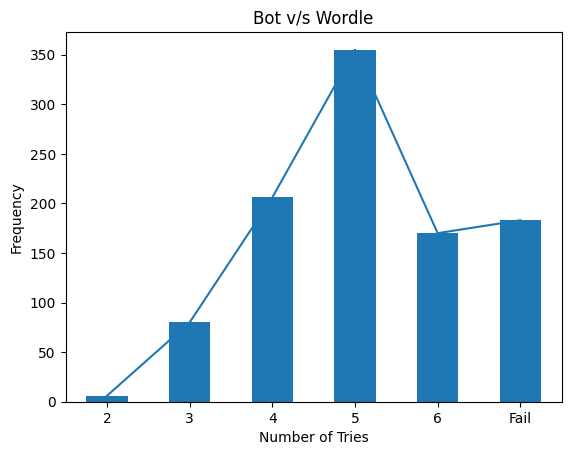

In [9]:
history = pd.Series(game_record).apply(lambda x: ('Fail' if x == 7 else x)).astype('str')
history = history.value_counts().sort_index()
pd.Series(history).plot(kind = "bar")
histoy = history/history.sum()
history.plot(kind = 'line')
plt.xlabel("Number of Tries")
plt.ylabel('Frequency')
plt.title('Bot v/s Wordle')
plt.show()

# Bot Performance

In [10]:
'Expectation', round(sum(game_record)/len(game_record), 4)

('Expectation', 5.152)

***

In [12]:
bot = player.Player(verbose= False)
wordle = game.Wordle()
wordle.wordle = np.array(['G','U','I','L','D'])
while type(bot.board_response) != int:
    bot.board_response = wordle.play(bot.guess())
    if(bot.board_response == -1):
        game_rec = 7
    else:
        game_rec = wordle.guess_number + 1

 S  A  N  E  S 
 C  O  O  L  Y 
 T  R  I  L  L 
 G  U  I  L  D 
GAME OVER
